In [1]:
print("Hello World")

Hello World


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


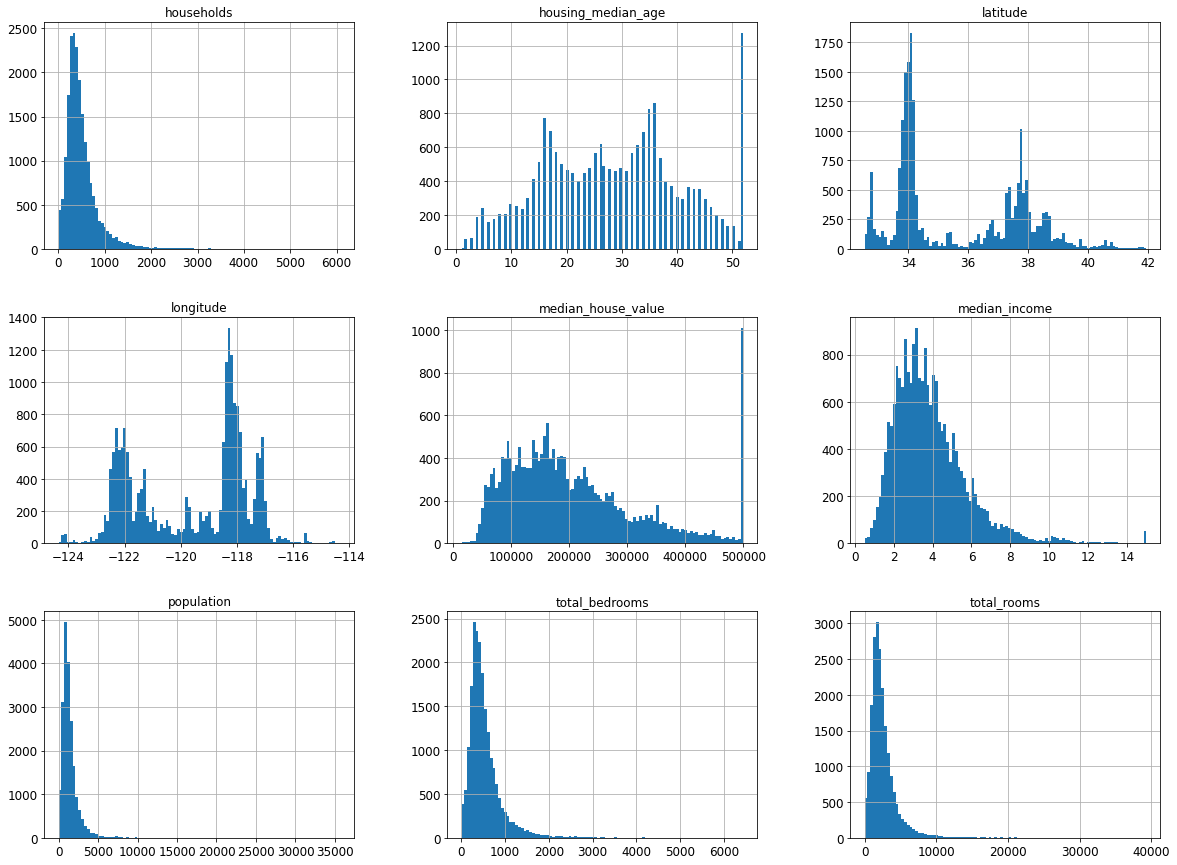

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=100, figsize=(20, 15))
plt.show()

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND
7113,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,<1H OCEAN
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN
18246,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0,NEAR BAY
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN


In [14]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


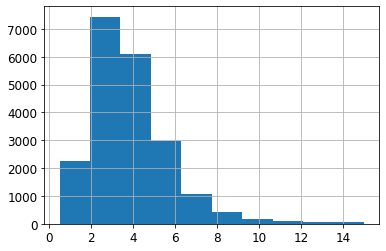

In [15]:
housing["median_income"].hist()

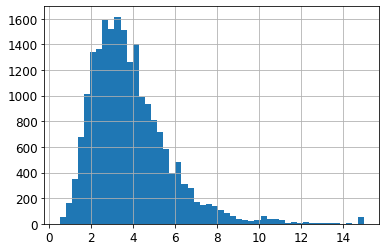

In [16]:
housing["median_income"].hist(bins=50)

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

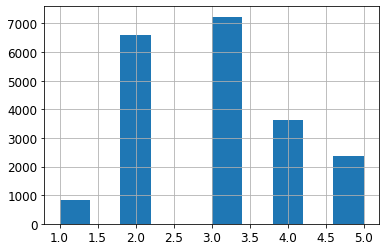

In [19]:
housing["income_cat"].hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [22]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [24]:
housing = strat_train_set.copy()

Saving figure better_visualization_plot


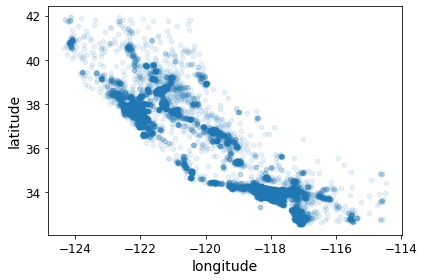

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


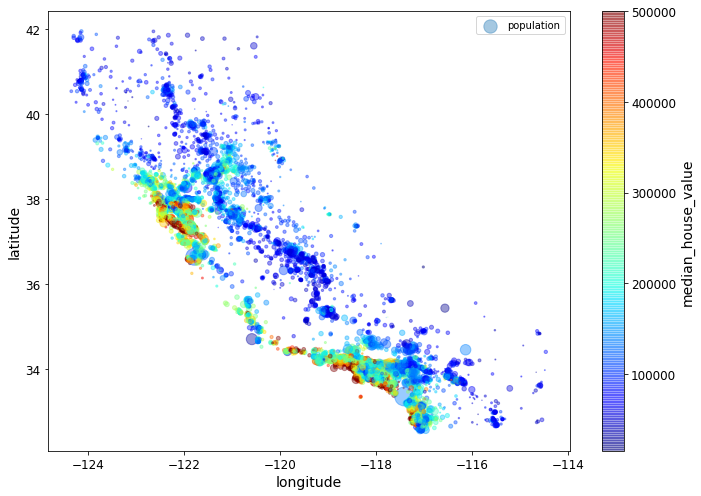

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [27]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x12435cf90>)

Saving figure california_housing_prices_plot


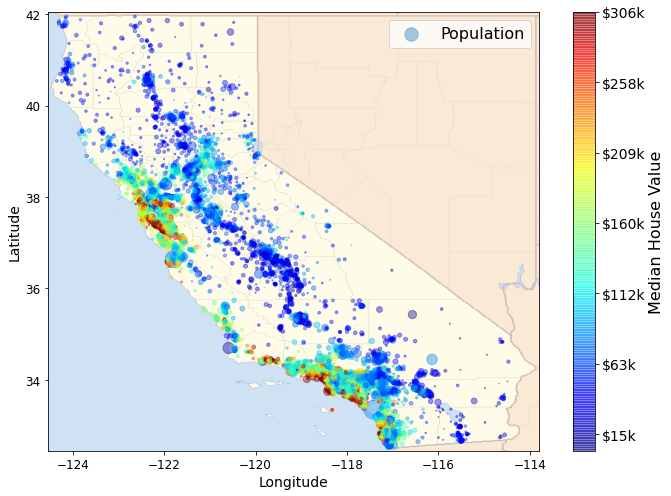

In [28]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [29]:
corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924903           -0.108097     0.041547   
latitude            -0.924903  1.000000            0.010784    -0.034359   
housing_median_age  -0.108097  0.010784            1.000000    -0.359036   
total_rooms          0.041547 -0.034359           -0.359036     1.000000   
total_bedrooms       0.065183 -0.064436           -0.317509     0.929552   
population           0.096933 -0.106834           -0.293215     0.853612   
households           0.051827 -0.069613           -0.300756     0.918026   
median_income       -0.013645 -0.081262           -0.113458     0.196382   
median_house_value  -0.043236 -0.145570            0.107144     0.137469   

                    total_bedrooms  population  households  median_income  \
longitude                 0.065183    0.096933    0.051827      -0.013645   
latitude                 -0.064436   -0.106834   -0.069613      -0.081262   
housing_

In [30]:
corr_matrix["median_house_value"].sort_values()

latitude             -0.145570
longitude            -0.043236
population           -0.023797
total_bedrooms        0.053544
households            0.069177
housing_median_age    0.107144
total_rooms           0.137469
median_income         0.688883
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688883
rooms_per_household         0.157620
total_rooms                 0.137469
housing_median_age          0.107144
households                  0.069177
total_bedrooms              0.053544
population                 -0.023797
population_per_household   -0.026888
longitude                  -0.043236
latitude                   -0.145570
bedrooms_per_room          -0.255870
Name: median_house_value, dtype: float64

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND
6590,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001,<1H OCEAN
17825,-121.88,37.40,9.0,6751.0,NaN,4240.0,1438.0,5.3400,<1H OCEAN


In [42]:
(housing.isnull().any(axis=1))

10275    False
20601    False
20138    False
18028    False
16289    False
         ...  
6358     False
618      False
3407     False
17590    False
4303     False
Length: 16512, dtype: bool

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [44]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [45]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [46]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [51]:
X = imputer.transform(housing_num)

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [94]:
housing_cat = housing[["ocean_proximity"]]

In [98]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [99]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [103]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [105]:

#### 
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
10275,-117.87,33.86,28,2292,531,2197,509,3.4856,<1H OCEAN,4.50295,4.31631
20601,-121.57,39.13,30,442,103,413,88,1.5694,INLAND,5.02273,4.69318
20138,-119.05,34.4,50,1236,282,1079,257,2.6991,<1H OCEAN,4.80934,4.19844
18028,-121.94,37.24,35,1484,244,664,238,4.675,<1H OCEAN,6.23529,2.78992
16289,-121.3,37.92,28,3308,766,3201,720,1.7694,INLAND,4.59444,4.44583


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [107]:
housing_num_tr

array([[ 0.84450121, -0.82473693, -0.04853356, ..., -0.38320306,
         0.11361593,  0.28225234],
       [-1.00168564,  1.64070891,  0.11081943, ..., -0.16739639,
         0.14811788,  0.30367359],
       [ 0.25571729, -0.5721106 ,  1.70434932, ..., -0.25599289,
         0.10282589,  0.22665626],
       ...,
       [ 0.62994436, -0.64228458,  1.22629035, ..., -0.20242628,
        -0.0122183 , -0.25527205],
       [-1.17133524,  0.78926462,  1.38564334, ..., -0.10505418,
        -0.06848902, -0.33912717],
       [ 0.62994436, -0.71713683,  0.03114293, ..., -1.03019125,
         0.04295583,  2.41512989]])

In [108]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [110]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [172713.58885788  43130.16935351 195014.22158132 268919.62476372
  44875.4698183 ]


In [111]:
print("Labels:", list(some_labels))

Labels: [142800.0, 57900.0, 181300.0, 245300.0, 73900.0]


In [112]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68284.24083518104

In [113]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49298.349236358634

In [114]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [115]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [116]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [117]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72574.92276573 70319.85476472 71531.74535818 70753.26782031
 69568.98423476 69073.82199559 72685.37174906 72790.86195518
 66961.45871527 69788.16297902]
Mean: 70604.84523378228
Standard deviation: 1769.438702947469


In [118]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68816.92050905 69919.6105217  66113.14067776 67981.42224765
 68715.57149727 69992.34941025 67163.97848562 70841.91062928
 66611.37068257 68651.01821515]
Mean: 68480.72928763037
Standard deviation: 1456.3942894476725


In [119]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [120]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18753.5167310552

In [121]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49822.29098122 53760.88248343 48034.27399507 50358.21992966
 50720.12445251 47869.85944347 49230.04756599 51383.07869398
 50175.77504723 51921.20439615]
Mean: 50327.57569887078
Standard deviation: 1684.6036343936619


In [122]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68480.729288
std       1535.174375
min      66113.140678
25%      67368.339426
50%      68683.294856
75%      69643.938019
max      70841.910629
dtype: float64

In [124]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110738.74409379561

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [126]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [127]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [132]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64270.43662389979 {'max_features': 2, 'n_estimators': 3}
55648.93987191406 {'max_features': 2, 'n_estimators': 10}
53182.861129826546 {'max_features': 2, 'n_estimators': 30}
59424.32276086727 {'max_features': 4, 'n_estimators': 3}
52796.32740190625 {'max_features': 4, 'n_estimators': 10}
50542.85099818166 {'max_features': 4, 'n_estimators': 30}
58287.44349267417 {'max_features': 6, 'n_estimators': 3}
52271.077291932685 {'max_features': 6, 'n_estimators': 10}
50356.93054757595 {'max_features': 6, 'n_estimators': 30}
58165.452826425004 {'max_features': 8, 'n_estimators': 3}
52305.46851194725 {'max_features': 8, 'n_estimators': 10}
50054.31378914332 {'max_features': 8, 'n_estimators': 30}
62275.432254250445 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54449.866577772744 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.12083339164 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53097.70055480836 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [133]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072203,0.002729,0.004714,0.001189,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.441077e+09,-3.994009e+09,...,-4.130689e+09,1.637626e+08,18,-1.075974e+09,-1.059009e+09,-1.114800e+09,-1.133138e+09,-1.093909e+09,-1.095366e+09,2.647402e+07
1,0.236399,0.009357,0.010549,0.000158,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.234825e+09,-2.982901e+09,...,-3.096805e+09,9.228829e+07,11,-5.697733e+08,-5.785134e+08,-6.022604e+08,-6.170530e+08,-6.017930e+08,-5.938786e+08,1.724586e+07
2,0.728460,0.029935,0.035690,0.010376,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.988122e+09,-2.732844e+09,...,-2.828417e+09,9.094781e+07,9,-4.243682e+08,-4.317242e+08,-4.539238e+08,-4.546966e+08,-4.391739e+08,-4.407773e+08,1.200306e+07
3,0.113251,0.001578,0.003940,0.000153,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.637095e+09,-3.426381e+09,...,-3.531250e+09,8.102265e+07,15,-9.242544e+08,-9.297806e+08,-1.014058e+09,-9.111553e+08,-9.529538e+08,-9.464405e+08,3.641271e+07
4,0.373460,0.010715,0.010657,0.000344,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.970209e+09,-2.723868e+09,...,-2.787452e+09,9.458774e+07,7,-5.207271e+08,-5.242982e+08,-5.312453e+08,-5.080340e+08,-5.399599e+08,-5.248529e+08,1.067042e+07
5,1.102124,0.003794,0.029994,0.000739,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.706710e+09,-2.491780e+09,...,-2.554580e+09,8.660337e+07,3,-3.793024e+08,-3.934729e+08,-3.960324e+08,-3.944068e+08,-3.960522e+08,-3.918533e+08,6.352383e+06
6,0.151464,0.001487,0.003889,0.000223,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.542486e+09,-3.434035e+09,...,-3.397426e+09,1.299822e+08,14,-8.263782e+08,-9.120793e+08,-8.880617e+08,-8.817686e+08,-8.720097e+08,-8.760595e+08,2.813790e+07
7,0.500568,0.008589,0.010408,0.000142,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.898326e+09,-2.670492e+09,...,-2.732266e+09,8.611668e+07,5,-4.871571e+08,-5.115005e+08,-5.118930e+08,-5.090419e+08,-5.008236e+08,-5.040832e+08,9.356477e+06
8,1.596747,0.109798,0.045862,0.032248,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.652020e+09,-2.478110e+09,...,-2.535820e+09,6.141775e+07,2,-3.687467e+08,-3.871205e+08,-3.908952e+08,-3.983166e+08,-3.881749e+08,-3.866508e+08,9.769416e+06
9,0.227817,0.026302,0.005042,0.000820,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.479452e+09,-3.207958e+09,...,-3.383220e+09,9.197150e+07,13,-8.469554e+08,-8.883192e+08,-9.400633e+08,-9.067451e+08,-8.999943e+08,-8.964155e+08,3.012139e+07


In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128d8f5d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128d8f110>},
                   random_state=42, scoring='neg_mean_squared_error')

In [135]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49200.143910527215 {'max_features': 7, 'n_estimators': 180}
51971.70596947373 {'max_features': 5, 'n_estimators': 15}
50736.50290792933 {'max_features': 3, 'n_estimators': 72}
51187.33256190894 {'max_features': 5, 'n_estimators': 21}
49433.579833403775 {'max_features': 7, 'n_estimators': 122}
50707.295469721605 {'max_features': 3, 'n_estimators': 75}
50566.012509732136 {'max_features': 3, 'n_estimators': 88}
49638.038133802256 {'max_features': 5, 'n_estimators': 100}
50340.20133987298 {'max_features': 3, 'n_estimators': 150}
65659.1517257817 {'max_features': 5, 'n_estimators': 2}


In [136]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.04557241e-02, 6.15128115e-02, 4.25672878e-02, 1.57000472e-02,
       1.49284851e-02, 1.49084337e-02, 1.44207566e-02, 3.76291817e-01,
       4.81760955e-02, 1.05983382e-01, 5.98885423e-02, 5.59223098e-03,
       1.63884097e-01, 3.10570422e-04, 1.94175701e-03, 3.43796228e-03])

In [137]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.376291816807621, 'median_income'),
 (0.163884097059388, 'INLAND'),
 (0.10598338151098491, 'pop_per_hhold'),
 (0.07045572412975172, 'longitude'),
 (0.06151281154221238, 'latitude'),
 (0.059888542336596844, 'bedrooms_per_room'),
 (0.04817609548550473, 'rooms_per_hhold'),
 (0.04256728779569895, 'housing_median_age'),
 (0.01570004721382453, 'total_rooms'),
 (0.014928485093804934, 'total_bedrooms'),
 (0.014908433720649266, 'population'),
 (0.014420756602583398, 'households'),
 (0.005592230984976704, '<1H OCEAN'),
 (0.003437962282887854, 'NEAR OCEAN'),
 (0.0019417570111563516, 'NEAR BAY'),
 (0.00031057042235842176, 'ISLAND')]

In [140]:
strat_test_set.drop("median_house_value", axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5784,-118.25,34.15,15.0,3712.0,1005.0,1888.0,890.0,3.6875,<1H OCEAN
378,-122.17,37.74,34.0,1223.0,281.0,824.0,280.0,2.2917,NEAR BAY
11018,-117.80,33.77,29.0,5436.0,707.0,2046.0,685.0,8.7496,<1H OCEAN
20392,-118.87,34.23,14.0,4242.0,746.0,1858.0,689.0,6.0145,<1H OCEAN
1999,-119.77,36.74,20.0,1855.0,519.0,1091.0,443.0,1.5547,INLAND
...,...,...,...,...,...,...,...,...,...
1712,-122.32,37.97,29.0,2347.0,464.0,1135.0,490.0,3.9722,NEAR BAY
640,-122.15,37.72,29.0,4169.0,1047.0,2024.0,962.0,2.8125,NEAR BAY
3749,-118.38,34.18,40.0,2079.0,568.0,1396.0,526.0,3.0061,<1H OCEAN
15989,-122.47,37.76,39.0,3200.0,689.0,1391.0,618.0,3.6346,NEAR BAY


In [145]:
from sklearn.svm import SVR

svr_reg = SVR(kernel="rbf")
svr_reg.fit(housing_prepared, housing_labels)

SVR()

In [146]:
housing_predictions = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118292.97659943995

In [147]:

svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [119692.84250415 119679.19049884 117127.17891915 122609.39610207
 118805.78949115 115786.82339169 116755.86335918 119163.22138594
 113963.00542315 119592.39362649]
Mean: 118317.57047018094
Standard deviation: 2323.0730844594787


In [160]:
params_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'kernel': ["linear"], 'C': [1000, 3000, 10000, 30000, 100000]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'kernel': ["rbf"], 'C': [1000, 3000, 10000, 30000, 100000], 'gamma': [0.3, 1, 3, "auto"]},
  ]

svr_reg = SVR()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(svr_reg, params_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=1000, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=1000, kernel=linear, total=   7.3s
[CV] C=1000, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] ............................ C=1000, kernel=linear, total=   6.5s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   6.8s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   6.7s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   6.5s
[CV] C=3000, kernel=linear ...........................................


KeyboardInterrupt: 

In [154]:
print('hello world')

hello world


In [159]:
grid_search.best_params_

{'C': 100000, 'gamma': 0.3, 'kernel': 'rbf'}